# Creacion del modelo

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss , accuracy_score

## Cargando Datos

In [2]:
data = pd.read_csv('../data/data_tranform.csv')

In [3]:
data.head()

,hour_sin,hour_cos,week_sin,week_cos,month_sin,month_cos,age,card_transaction_count,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0.500000,-8.660254e-01,-0.974928,-0.222521,-2.449294e-16,1.0,58,14,2.0,86.19,0.0,90403,34.0287,-118.4924,92043,1354877706,33.287851,-118.740970,0
1,-0.258819,-9.659258e-01,-0.433884,-0.900969,8.660254e-01,-0.5,41,24,0.0,85.81,0.0,63867,36.7154,-89.6287,1019,1364994606,36.539950,-89.857416,0
2,0.965926,-2.588190e-01,0.974928,-0.222521,-2.449294e-16,1.0,74,9,4.0,99.30,0.0,15449,39.9636,-79.7853,184,1354604824,39.582872,-78.838550,0
3,-1.000000,-1.836970e-16,-0.781831,0.623490,1.224647e-16,-1.0,47,26,6.0,42.09,0.0,59448,48.2777,-112.8456,743,1341081788,48.310513,-112.837535,0
4,-0.965926,2.588190e-01,0.000000,1.000000,8.660254e-01,-0.5,32,10,11.0,4.24,0.0,37663,36.4715,-82.4834,87124,1334519869,37.329094,-82.070746,0


## Preparando Datos

### Separando datos

In [4]:
X = data.drop(columns=['is_fraud'] , axis = 1)
Y = data['is_fraud']

x_train , x_test , y_train , y_test = train_test_split(X , Y , shuffle=True , test_size=0.2 , random_state= 42)

### Escalando datos

In [5]:
escaler = StandardScaler()
x_scaled_train = escaler.fit_transform(x_train)
x_scaled_test = escaler.transform(x_test)

## Preparando parametros

In [6]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}

param_grid_gb = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 75 , 100, 125],
    'max_depth': range(4 , 9)
}

param_grid_rf = {
    'n_estimators': [50, 75 ,100, 125],
    'max_depth': [None, 10, 20 , 30],
    'min_samples_split': range(3 , 7),
    'min_samples_leaf': range(1 , 5)
}

## Entrenando modelos

### Instanciando modelos

In [7]:
model_lr = LogisticRegression()
model_gb = GradientBoostingClassifier()
model_rf = RandomForestClassifier()

### Buscando los mejores parametros y el mejor modelo

In [8]:
grid_lr = GridSearchCV(
    estimator=model_lr ,
    param_grid=param_grid_lr ,
    scoring='accuracy' ,
    n_jobs= -1 ,
    cv = 5,
    verbose=1)

grid_gb = GridSearchCV(
    estimator=model_gb ,
    param_grid=param_grid_gb ,
    n_jobs= -1 ,
    scoring='accuracy' ,
    cv = 5,
    verbose=1)

grid_rf = GridSearchCV(
    estimator=model_rf ,
    param_grid=param_grid_rf ,
    scoring='accuracy' ,
    n_jobs= -1 ,
    cv = 5,
    verbose=1)

### Modelo de Regression logistica

In [9]:
grid_lr.fit(x_scaled_train , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/cristian/No_Country/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cristian/No_Country/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cristian/No_Country/env/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cristian/No_Country/env/lib/python3.11/site-packages/skle

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [10]:
print(f"Mejor accuracy score : {grid_lr.best_score_}")

Mejor accuracy score : 0.8422849069618161


In [11]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

### Modelo GradientBoostingClassifier

In [12]:
grid_gb.fit(x_scaled_train , y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': range(4, 9),
                         'n_estimators': [50, 75, 100, 125]},
             scoring='accuracy', verbose=1)

In [13]:
print(f"Mejor accuracy score : {grid_gb.best_score_}")

Mejor accuracy score : 0.9767671740993293


In [14]:
grid_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 125}

### Modelo RandomForest

In [15]:
grid_rf.fit(x_scaled_train , y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(3, 7),
                         'n_estimators': [50, 75, 100, 125]},
             scoring='accuracy', verbose=1)

In [16]:
print(f"Mejor accuracy score : {grid_rf.best_score_}")

Mejor accuracy score : 0.9658589035029465


In [17]:
grid_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 125}

## Evaluando el modelo con mejor score

In [43]:
model_gb = grid_gb.best_estimator_
model_lr = grid_lr.best_estimator_
model_rf = grid_rf.best_estimator_

In [49]:
y_predict_gb = model_gb.predict(x_scaled_test)
y_predict_lr = model_lr.predict(x_scaled_test)
y_predict_rf = model_rf.predict(x_scaled_test)

### Accuracy Score

In [51]:
accuracy_gb = accuracy_score(y_test ,y_predict_gb )
accuracy_lr = accuracy_score(y_test ,y_predict_lr )
accuracy_rf = accuracy_score(y_test ,y_predict_rf )

In [52]:
print(f"Accuracy score de GradientBoost : {accuracy_gb}")
print(f"Accuracy score de RandomForest : {accuracy_rf}")
print(f"Accuracy score de LogisticRegression : {accuracy_lr}")

Accuracy score de GradientBoost : 0.98001998001998
Accuracy score de RandomForest : 0.965034965034965
Accuracy score de LogisticRegression : 0.8411588411588412


### Log Loss

In [54]:
loss_gb = log_loss(y_test, y_predict_gb)
loss_rf = log_loss(y_test, y_predict_rf)
loss_lr = log_loss(y_test, y_predict_lr)

In [55]:
print(f"Log Loss score de GradientBoost : {loss_gb}")
print(f"Log Loss score de RandomForest : {loss_rf}")
print(f"Log Loss score de LogisticRegression : {loss_lr}")

Log Loss score de GradientBoost : 0.7201529148674758
Log Loss score de RandomForest : 1.2602676010180824
Log Loss score de LogisticRegression : 5.7252156731964305


## Visualizacion de resutados del mejor modelo

In [64]:
resultado = (y_test == y_predict_gb)
resultado1 = pd.DataFrame(resultado)

/tmp/ipykernel_26556/1092976287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=resultado , kind= 'count' , palette= 'dark')


is_fraud
True        2943
False         60
Name: count, dtype: int64


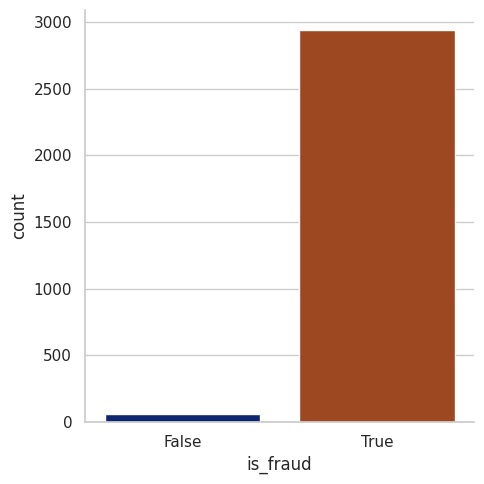

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook' , style= 'whitegrid')

sns.catplot(x=resultado , kind= 'count' , palette= 'dark')
print(resultado1.value_counts())


### Matriz de confusion

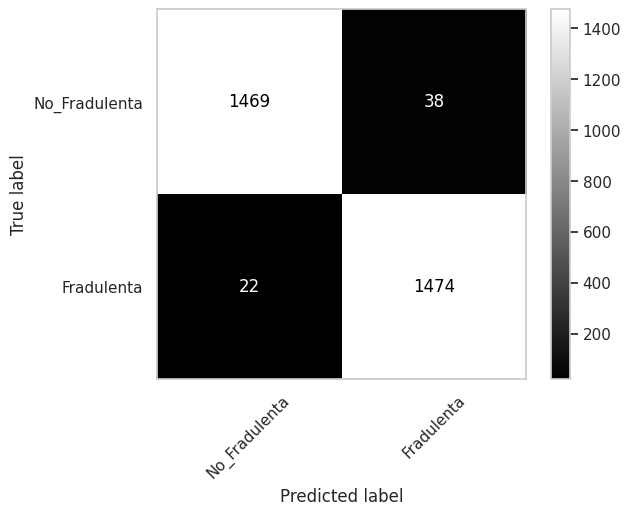

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict_gb)
display_labels = ['No_Fradulenta' , 'Fradulenta']
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=display_labels)
disp.plot(cmap="gray")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## Exportacion de modelo

In [71]:
import joblib

joblib.dump(model_gb , '../Model/model.pkl')

['../Model/model.pkl']